In [ ]:
import os

# Change the directory to the desired path
os.chdir(r'E:\Machine Learning Projects\MIMIC-III\mimic-iii-clinical-database-demo-1.4')

# Print the current working directory
print(os.getcwd())

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv(r'E:\Machine Learning Projects\MIMIC-III\mimic3d.csv')



In [3]:
df

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,M,60,24.58,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,DIVORCED,...,0.20,0.13,23.11,8.01,0.00,0.08,1315.46,0,1746.31,3
58972,199994,F,58,9.75,EMERGENCY,EMERGENCY ROOM ADMIT,MENTAL STATUS CHANGES,Medicare,CATHOLIC,SINGLE,...,2.26,0.30,7.90,0.00,0.00,0.31,674.05,0,834.98,2
58973,199995,M,23,16.75,EMERGENCY,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,Private,PROTESTANT QUAKER,SINGLE,...,0.54,0.10,6.27,5.79,0.00,0.36,207.10,0,261.30,3
58974,199998,M,69,5.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,...,0.17,0.35,12.24,17.69,0.00,1.02,426.87,0,537.42,1


In [5]:
df.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1


In [7]:
df.tail()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
58971,199993,M,60,24.58,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,DIVORCED,...,0.20,0.13,23.11,8.01,0.00,0.08,1315.46,0,1746.31,3
58972,199994,F,58,9.75,EMERGENCY,EMERGENCY ROOM ADMIT,MENTAL STATUS CHANGES,Medicare,CATHOLIC,SINGLE,...,2.26,0.30,7.90,0.00,0.00,0.31,674.05,0,834.98,2
58973,199995,M,23,16.75,EMERGENCY,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,Private,PROTESTANT QUAKER,SINGLE,...,0.54,0.10,6.27,5.79,0.00,0.36,207.10,0,261.30,3
58974,199998,M,69,5.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,...,0.17,0.35,12.24,17.69,0.00,1.02,426.87,0,537.42,1
58975,199999,M,88,5.50,EMERGENCY,CLINIC REFERRAL/PREMATURE,PNEUMONIA,Medicare,JEWISH,MARRIED,...,1.64,0.40,4.73,5.82,0.55,0.73,550.36,0,614.59,1


In [9]:
df.describe()

,hadm_id,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,149970.809584,53.005884,10.114955,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,1.360248
std,28883.095213,26.028120,12.456231,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,100001.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124952.750000,43.000000,3.710000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,0.000000
50%,149989.500000,59.000000,6.460000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,1.000000
75%,174966.500000,73.000000,11.790000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,2.000000
max,199999.000000,89.000000,294.630000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,3.000000


In [11]:
df.describe(include='all')

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976,58976.000000,58976.000000,58976,58976,58951,58976,58518,48848,...,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
unique,NaN,2,NaN,NaN,4,9,15691,5,20,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,NEWBORN,Medicare,CATHOLIC,MARRIED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32950,NaN,NaN,42071,22754,7823,28215,20606,24239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,149970.809584,NaN,53.005884,10.114955,NaN,NaN,NaN,NaN,NaN,NaN,...,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,1.360248
std,28883.095213,NaN,26.028120,12.456231,NaN,NaN,NaN,NaN,NaN,NaN,...,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,100001.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124952.750000,NaN,43.000000,3.710000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,0.000000
50%,149989.500000,NaN,59.000000,6.460000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,1.000000
75%,174966.500000,NaN,73.000000,11.790000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,2.000000


In [12]:
df.columns

Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [15]:
df.isnull().sum()

hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         25
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hadm_id           58976 non-null  int64  
 1   gender            58976 non-null  object 
 2   age               58976 non-null  int64  
 3   LOSdays           58976 non-null  float64
 4   admit_type        58976 non-null  object 
 5   admit_location    58976 non-null  object 
 6   AdmitDiagnosis    58951 non-null  object 
 7   insurance         58976 non-null  object 
 8   religion          58518 non-null  object 
 9   marital_status    48848 non-null  object 
 10  ethnicity         58976 non-null  object 
 11  NumCallouts       58976 non-null  float64
 12  NumDiagnosis      58976 non-null  float64
 13  NumProcs          58976 non-null  float64
 14  AdmitProcedure    58976 non-null  object 
 15  NumCPTevents      58976 non-null  float64
 16  NumInput          58976 non-null  float6

In [17]:
# Print the number of null values in the AdmitDiagnosis column
print(df['AdmitDiagnosis'].isnull().sum())


25


In [27]:
df['AdmitDiagnosis'].dtype

dtype('O')

In [33]:
df['AdmitDiagnosis'] = pd.to_numeric(df['AdmitDiagnosis'], errors='coerce')


In [35]:
df['AdmitDiagnosis'].mean()


729.5

In [37]:
df['AdmitDiagnosis'].median()

729.5

In [45]:
df['AdmitDiagnosis']=df['AdmitDiagnosis'].fillna(729.5)

In [49]:
df['AdmitDiagnosis'].isnull().sum()

0

In [51]:
# Remove columns where all values are null
df= df.dropna(axis=1, how='all')

In [53]:
df.isnull().sum()

hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis          0
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64

In [55]:
df= df.dropna(axis=0, how='all')


In [57]:
df.isnull().sum()

hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis          0
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64

In [59]:
df = df.dropna(how='all')


In [61]:
df.isnull().sum()

hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis          0
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64

In [63]:
# Remove rows where either 'religion' or 'marital_status' has null values
df = df.dropna(subset=['religion', 'marital_status'])

print(df)

       hadm_id gender  age  LOSdays admit_type             admit_location  \
0       100001      F   35     6.17  EMERGENCY  CLINIC REFERRAL/PREMATURE   
1       100003      M   59     4.04  EMERGENCY       EMERGENCY ROOM ADMIT   
2       100006      F   48    12.04  EMERGENCY       EMERGENCY ROOM ADMIT   
3       100007      F   73     7.29  EMERGENCY       EMERGENCY ROOM ADMIT   
4       100009      M   60     4.88  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
...        ...    ...  ...      ...        ...                        ...   
58971   199993      M   60    24.58  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
58972   199994      F   58     9.75  EMERGENCY       EMERGENCY ROOM ADMIT   
58973   199995      M   23    16.75  EMERGENCY  PHYS REFERRAL/NORMAL DELI   
58974   199998      M   69     5.88  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
58975   199999      M   88     5.50  EMERGENCY  CLINIC REFERRAL/PREMATURE   

       AdmitDiagnosis insurance           religion marital_status  ...  \
0

In [65]:
df.isnull().sum()

hadm_id             0
gender              0
age                 0
LOSdays             0
admit_type          0
admit_location      0
AdmitDiagnosis      0
insurance           0
religion            0
marital_status      0
ethnicity           0
NumCallouts         0
NumDiagnosis        0
NumProcs            0
AdmitProcedure      0
NumCPTevents        0
NumInput            0
NumLabs             0
NumMicroLabs        0
NumNotes            0
NumOutput           0
NumRx               0
NumProcEvents       0
NumTransfers        0
NumChartEvents      0
ExpiredHospital     0
TotalNumInteract    0
LOSgroupNum         0
dtype: int64

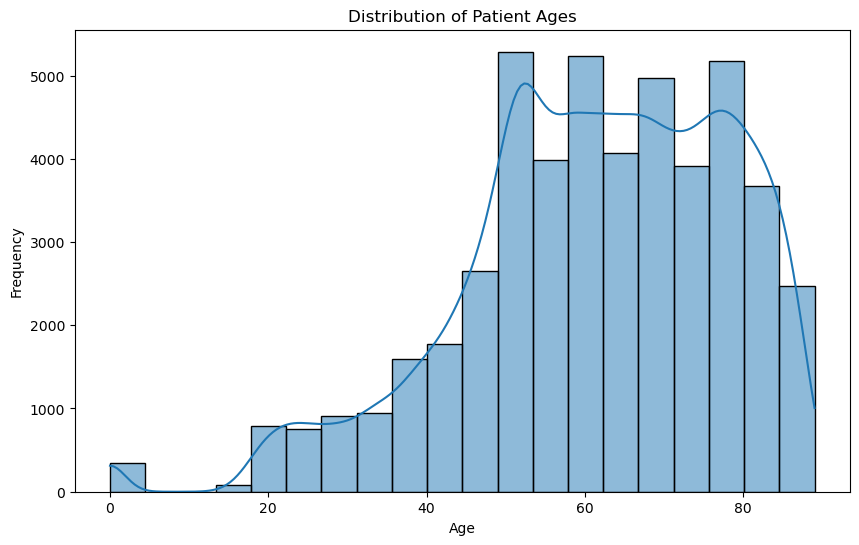

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

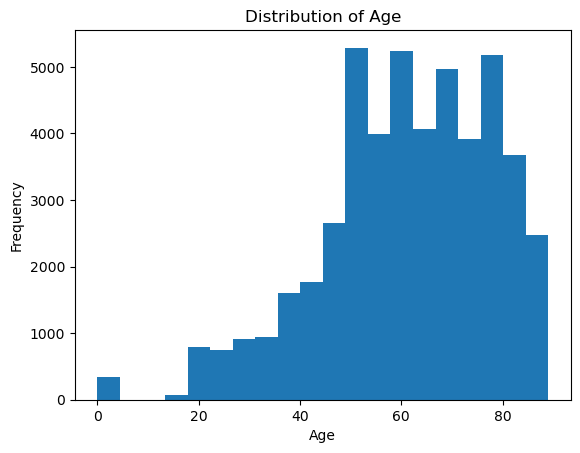

In [69]:
##Distribution of Age###
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


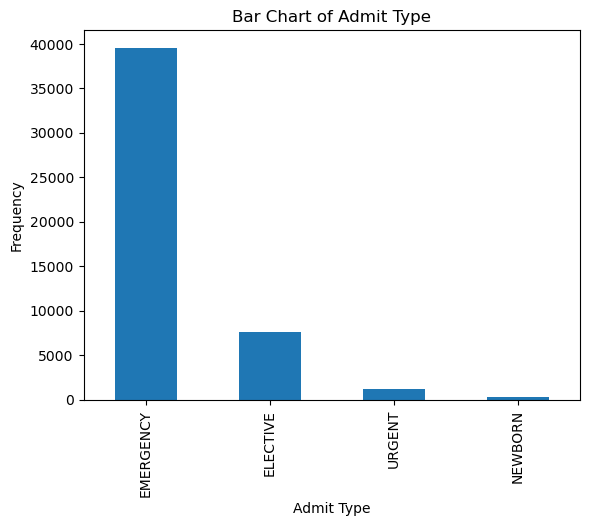

In [71]:
#####Plot 2: Bar Chart of Admit Type####
import matplotlib.pyplot as plt

df['admit_type'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Admit Type')
plt.xlabel('Admit Type')
plt.ylabel('Frequency')
plt.show()

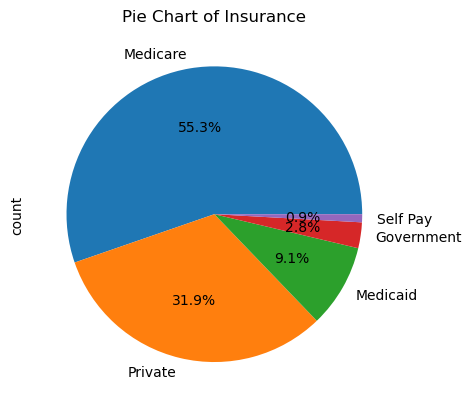

In [73]:
####Plot 3: Pie Chart of Insurance####
import matplotlib.pyplot as plt

df['insurance'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Insurance')
plt.show()

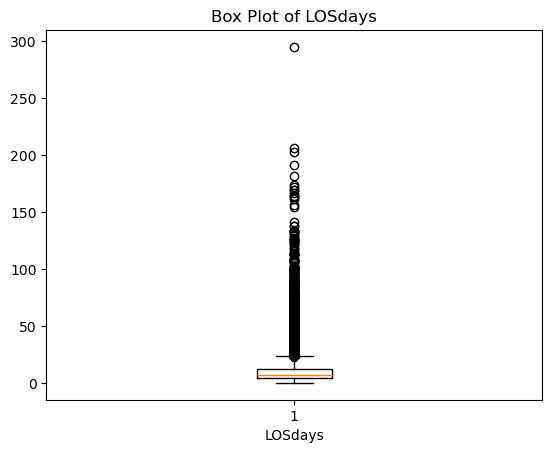

In [75]:
#####Plot 4: Box Plot of LOSdays#####
import matplotlib.pyplot as plt

plt.boxplot(df['LOSdays'])
plt.title('Box Plot of LOSdays')
plt.xlabel('LOSdays')
plt.show()

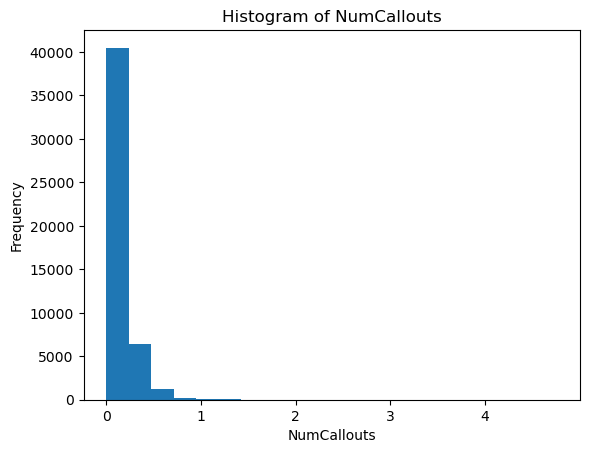

In [77]:
######Plot 5: Histogram of NumCallouts########

import matplotlib.pyplot as plt

plt.hist(df['NumCallouts'], bins=20)
plt.title('Histogram of NumCallouts')
plt.xlabel('NumCallouts')
plt.ylabel('Frequency')
plt.show()

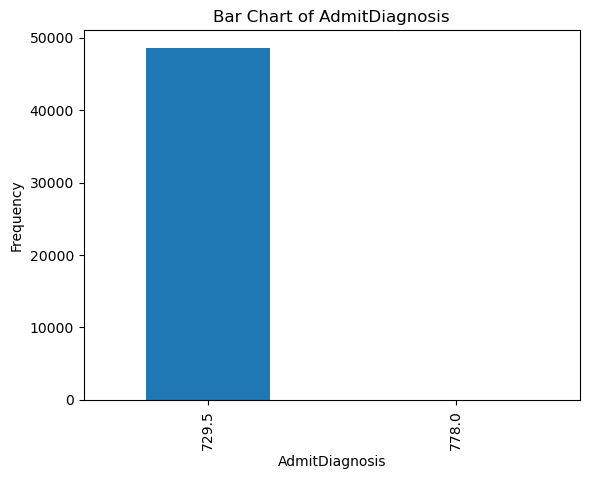

In [79]:
###Plot 6: Bar Chart of AdmitDiagnosis####
import matplotlib.pyplot as plt

df['AdmitDiagnosis'].value_counts().plot(kind='bar')
plt.title('Bar Chart of AdmitDiagnosis')
plt.xlabel('AdmitDiagnosis')
plt.ylabel('Frequency')
plt.show()

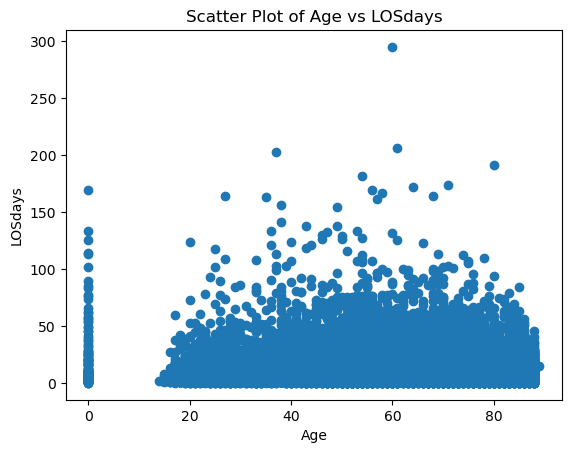

In [81]:
###Plot 7: Scatter Plot of Age vs LOSdays####
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['LOSdays'])
plt.title('Scatter Plot of Age vs LOSdays')
plt.xlabel('Age')
plt.ylabel('LOSdays')
plt.show()


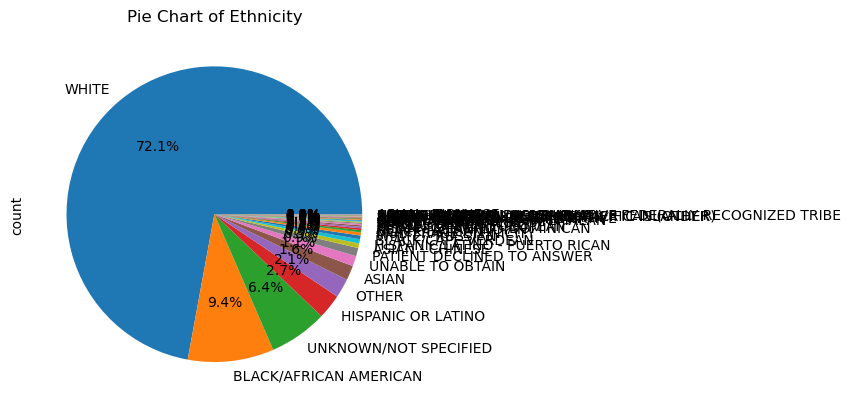

In [83]:
###Plot 8: Pie Chart of Ethnicity####
import matplotlib.pyplot as plt

df['ethnicity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Ethnicity')
plt.show()


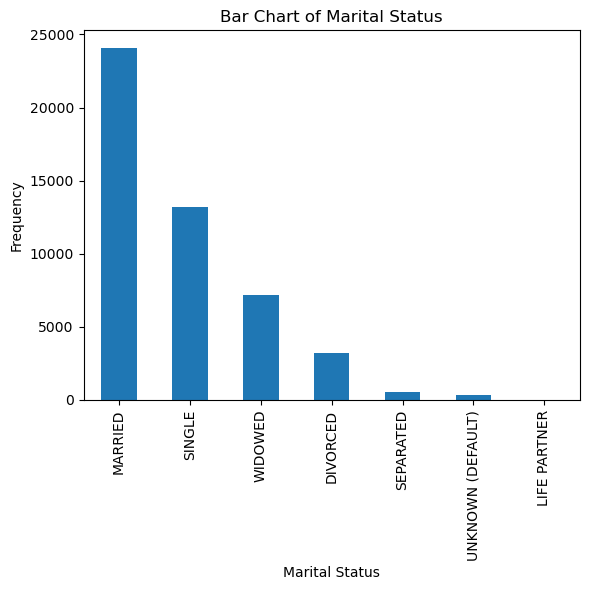

In [85]:
###Plot 9: Bar Chart of Marital Status###
import matplotlib.pyplot as plt

df['marital_status'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

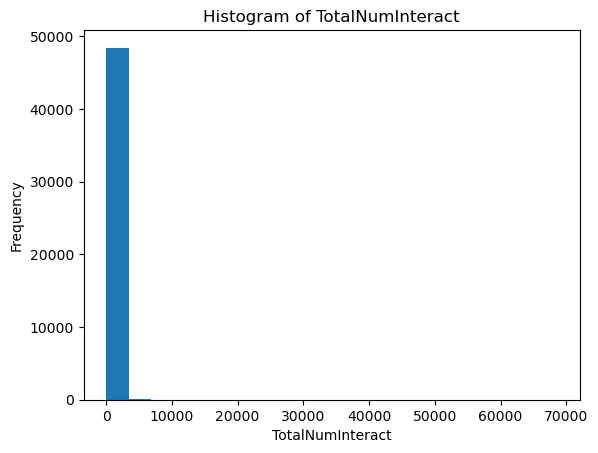

In [87]:
#####Plot 10: Histogram of TotalNumInteract#####
import matplotlib.pyplot as plt

plt.hist(df['TotalNumInteract'], bins=20)
plt.title('Histogram of TotalNumInteract')
plt.xlabel('TotalNumInteract')
plt.ylabel('Frequency')
plt.show()


In [89]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [105]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [109]:
# Define features (X) and target (y)
X = df_encoded.drop(columns=['ExpiredHospital'])
y = df_encoded['ExpiredHospital']

In [111]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Set max_iter to ensure convergence

In [115]:

# Train the model
model.fit(X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [117]:
# Make predictions
y_pred = model.predict(X_test)

In [119]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9201865057597367


In [125]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.9201865057597367
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13061
           1       0.79      0.32      0.46      1523

    accuracy                           0.92     14584
   macro avg       0.86      0.66      0.71     14584
weighted avg       0.91      0.92      0.90     14584

Logistic Regression Confusion Matrix:
[[12928   133]
 [ 1031   492]]


In [127]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.9201865057597367
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13061
           1       0.79      0.32      0.46      1523

    accuracy                           0.92     14584
   macro avg       0.86      0.66      0.71     14584
weighted avg       0.91      0.92      0.90     14584

Decision Tree Confusion Matrix:
[[12928   133]
 [ 1031   492]]


In [129]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.9201865057597367
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13061
           1       0.79      0.32      0.46      1523

    accuracy                           0.92     14584
   macro avg       0.86      0.66      0.71     14584
weighted avg       0.91      0.92      0.90     14584

Random Forest Confusion Matrix:
[[12928   133]
 [ 1031   492]]


In [131]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred))
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred))
print("Support Vector Machine Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Support Vector Machine Accuracy: 0.9201865057597367
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13061
           1       0.79      0.32      0.46      1523

    accuracy                           0.92     14584
   macro avg       0.86      0.66      0.71     14584
weighted avg       0.91      0.92      0.90     14584

Support Vector Machine Confusion Matrix:
[[12928   133]
 [ 1031   492]]


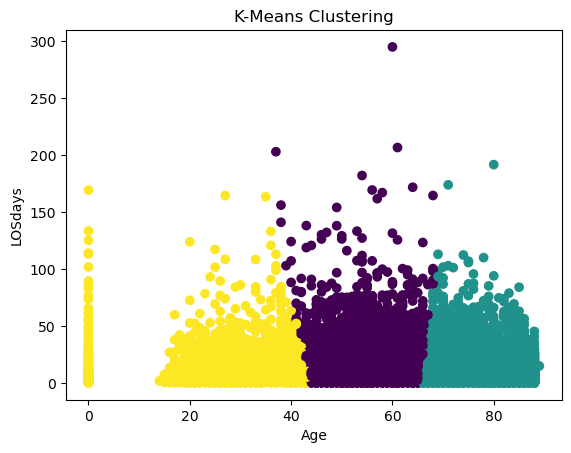

In [135]:
#K-Means Clustering#

from sklearn.cluster import KMeans

# Select the features to use for clustering
X = df[['age', 'LOSdays']]

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels for the data
labels = kmeans.predict(X)

# Plot the clusters
plt.scatter(X['age'], X['LOSdays'], c=labels)
plt.xlabel('Age')
plt.ylabel('LOSdays')
plt.title('K-Means Clustering')
plt.show()

In [143]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select the features to use for clustering
X = df[['age', 'LOSdays']]

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels for the data
labels = kmeans.predict(X)

# Calculate the silhouette score
silhouette = silhouette_score(X, labels)

# Print the silhouette score
print("Silhouette Score:", silhouette)





Silhouette Score: 0.41465754201905985


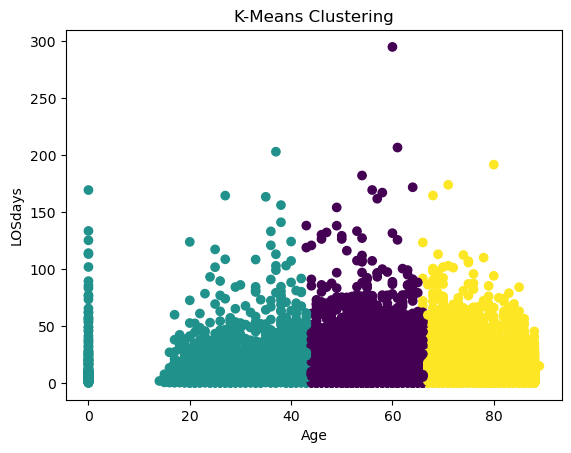

In [145]:
# Plot the clusters
plt.scatter(X['age'], X['LOSdays'], c=labels)
plt.xlabel('Age')
plt.ylabel('LOSdays')
plt.title('K-Means Clustering')
plt.show()



In [153]:

import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Select the features to use for clustering
X = df[['age', 'LOSdays']]

# Reduce the size of the dataset
np.random.seed(0)
indices = np.random.choice(X.shape[0], 10000, replace=False)
X = X.iloc[indices]

# Create a Hierarchical Clustering model with 3 clusters
hclust = AgglomerativeClustering(n_clusters=3)

# Fit the model to the data
hclust.fit(X)

# Predict the cluster labels for the data
labels = hclust.labels_

# Calculate the silhouette score
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, labels)

# Print the silhouette score
print("AgglomerativeClustering Score:", silhouette)

AgglomerativeClustering Score: 0.44665245528659736


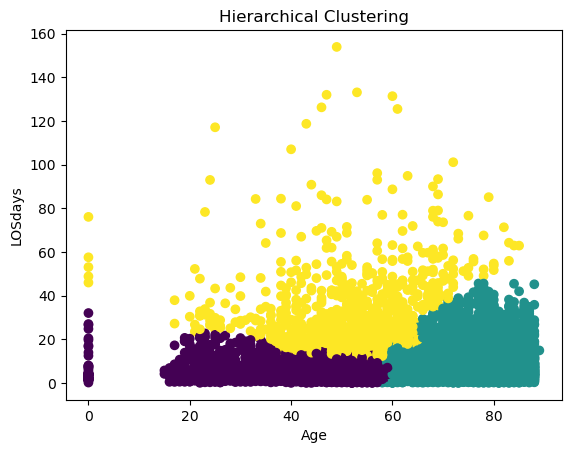

In [155]:
# Plot the clusters
plt.scatter(X['age'], X['LOSdays'], c=labels)
plt.xlabel('Age')
plt.ylabel('LOSdays')
plt.title('Hierarchical Clustering')
plt.show()

In [159]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Select the features to use for PCA
X = df[['age', 'LOSdays', 'NumCallouts', 'NumDiagnosis']]

# Create a PCA model with 2 components
pca = PCA(n_components=2)

# Fit the model to the data
pca.fit(X)

# Transform the data into the new coordinate system
X_pca = pca.transform(X)

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)



Explained Variance Ratio:
[0.62227738 0.26407549]


In [ ]:
# Plot the data in the new coordinate system
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

In [161]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Select the features to use for PCA
X = df[['age', 'LOSdays', 'NumCallouts', 'NumDiagnosis']]

# Reduce the size of the dataset
np.random.seed(0)
indices = np.random.choice(X.shape[0], 10000, replace=False)
X = X.iloc[indices]

# Create a PCA model with 2 components
pca = PCA(n_components=2)

# Fit the model to the data
pca.fit(X)

# Transform the data into the new coordinate system
X_pca = pca.transform(X)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("PCA Explained Variance Ratio:", explained_variance_ratio)



PCA Explained Variance Ratio: [0.65185168 0.26456657]


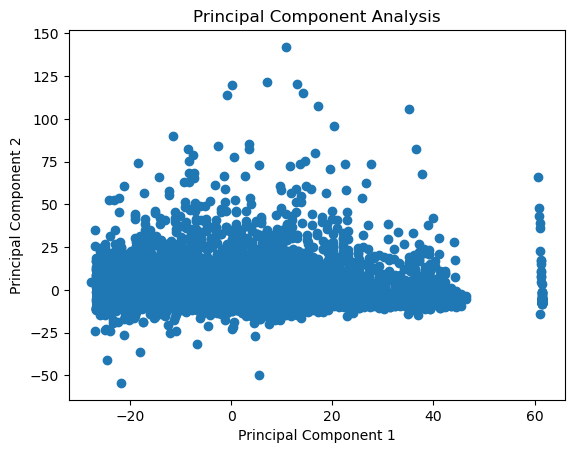

In [163]:
# Plot the data in the new coordinate system
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()